In [32]:
%load_ext autoreload
%autoreload 2

import math

import matplotlib.pyplot as plt

import torch
import torch.nn as nn # Includes all modules, nn.Linear, nn.Conv2d, BatchNorm etc

from model import Encoder, Decoder
from data_handler import DataHandler
from utils import display_image, visualize_attention
from torch.utils.data import DataLoader # Helps with managing datasets in mini batches
from train import train
import config

from model_handler import ModelHandler

device = config.DEVICE


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


building vocabulary from gensim model


100%|███████████████████████████████████████████████████████████████████████| 31783/31783 [00:00<00:00, 1986048.75it/s]


[Factory] Creating new model


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


CONFIG:
-----------------------------------------------------------
BATCH_SIZE: 8
NUM_EPOCHS: 20
ENCODER_LR: 0.0001
DECODER_LR: 0.001
START_EPOCH: 0
HIDDEN_SIZE: 512
EMBED_SIZE: 512
ATTENTION_SIZE: 512
NUM_HIDDEN_LAYERS: 2
ENCODER_DROPOUT: 0.5
DECODER_DROPOUT: 0.5
ATTENTION_DROPOUT: 0.5
NUM_WORKERS: 1
FINE_TUNE_EMBEDDINGS: False
DEVICE: cuda
PRINT_EVERY_NTH_BATCH: 100
-----------------------------------------------------------
[['A', 'child', 'in', 'a', 'pink', 'dress', 'is', 'climbing', 'up', 'a', 'set', 'of', 'stairs', 'in', 'an', 'entry', 'way'], ['A', 'little', 'girl', 'in', 'a', 'pink', 'dress', 'going', 'into', 'a', 'wooden', 'cabin'], ['A', 'little', 'girl', 'climbing', 'the', 'stairs', 'to', 'her', 'playhouse'], ['A', 'little', 'girl', 'climbing', 'into', 'a', 'wooden', 'playhouse'], ['A', 'girl', 'going', 'into', 'a', 'wooden', 'building']]
['Two', 'men', 'in', 'green', 'shirts', 'are', 'standing', 'in', 'a', 'yard']


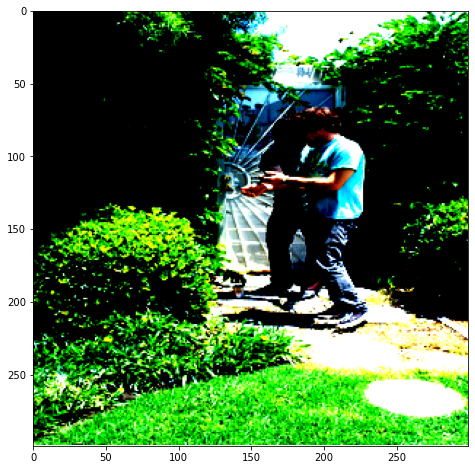

In [33]:
model_handler = ModelHandler('playground')
data, vocab, encoder, decoder, encoder_optimizer, decoder_optimizer, config_dict = model_handler.load()


fig, axis = plt.subplots(1, figsize=(8,8))
data.eval()
img_tensor, caption = data[2]
print(caption)
data.train()

img_tensor, caption = data[2]

display_image(axis, img_tensor)

print(caption)

In [34]:
features = encoder.forward(torch.unsqueeze(img_tensor, dim=0).expand(2, -1, -1, -1).to(device))
print(features.shape)
predictions, captions, output_lengths, alphas, sorted_indices = decoder(features, torch.tensor([[1,2,3,4,5,6], [1,2,3,4,5,6]]).to(device), torch.tensor([[6], [6]]).to(device), debug=True)

torch.Size([2, 2048, 14, 14])


[[2, 8643, 2792, 8248, 9145, 8702, 16, 8702, 8335, 6552, 3990, 7296, 5079, 3990, 8022, 2939, 3111, 7903, 3061, 5305, 746, 3395, 6316, 7296, 2802, 8525, 7334, 5388, 3395, 3168, 4867, 1020, 1900, 8702, 8702, 8702, 9336, 3990, 2003, 599, 16, 3395, 3204, 8702, 1020, 4867, 1020, 3780, 3806, 3806, 1900], [2, 3395, 8702, 8668, 2647, 3336, 434, 1020, 6927, 3395, 5310, 1020, 8916, 3111, 8702, 3111, 7366, 1020, 4972, 1086, 2026, 7867, 1020, 1020, 5581, 1020, 7106, 2234, 5823, 3987, 3987, 16, 5079, 5023, 4896, 3204, 5079, 3395, 1020, 7294, 4972, 5823, 4025, 1020, 7296, 5823, 1020, 8702, 5079, 1020, 1020]]
[['<start>', 'mir', 'collapse', 'senegal', 'variable', 'embassies', 'that', 'embassies', 'overhead', 'developers', 'hostage', 'huang', 'des', 'hostage', 'dangers', 'tower', 'casualties', '1909', 'writes', 'warnings', 'republican', 'lift', 'responsibilities', 'huang', 'membership', 'carved', 'cleaning', 'imported', 'lift', 'fishing', 'protecting', 'rebels', 'apparently', 'embassies', 'embassies',

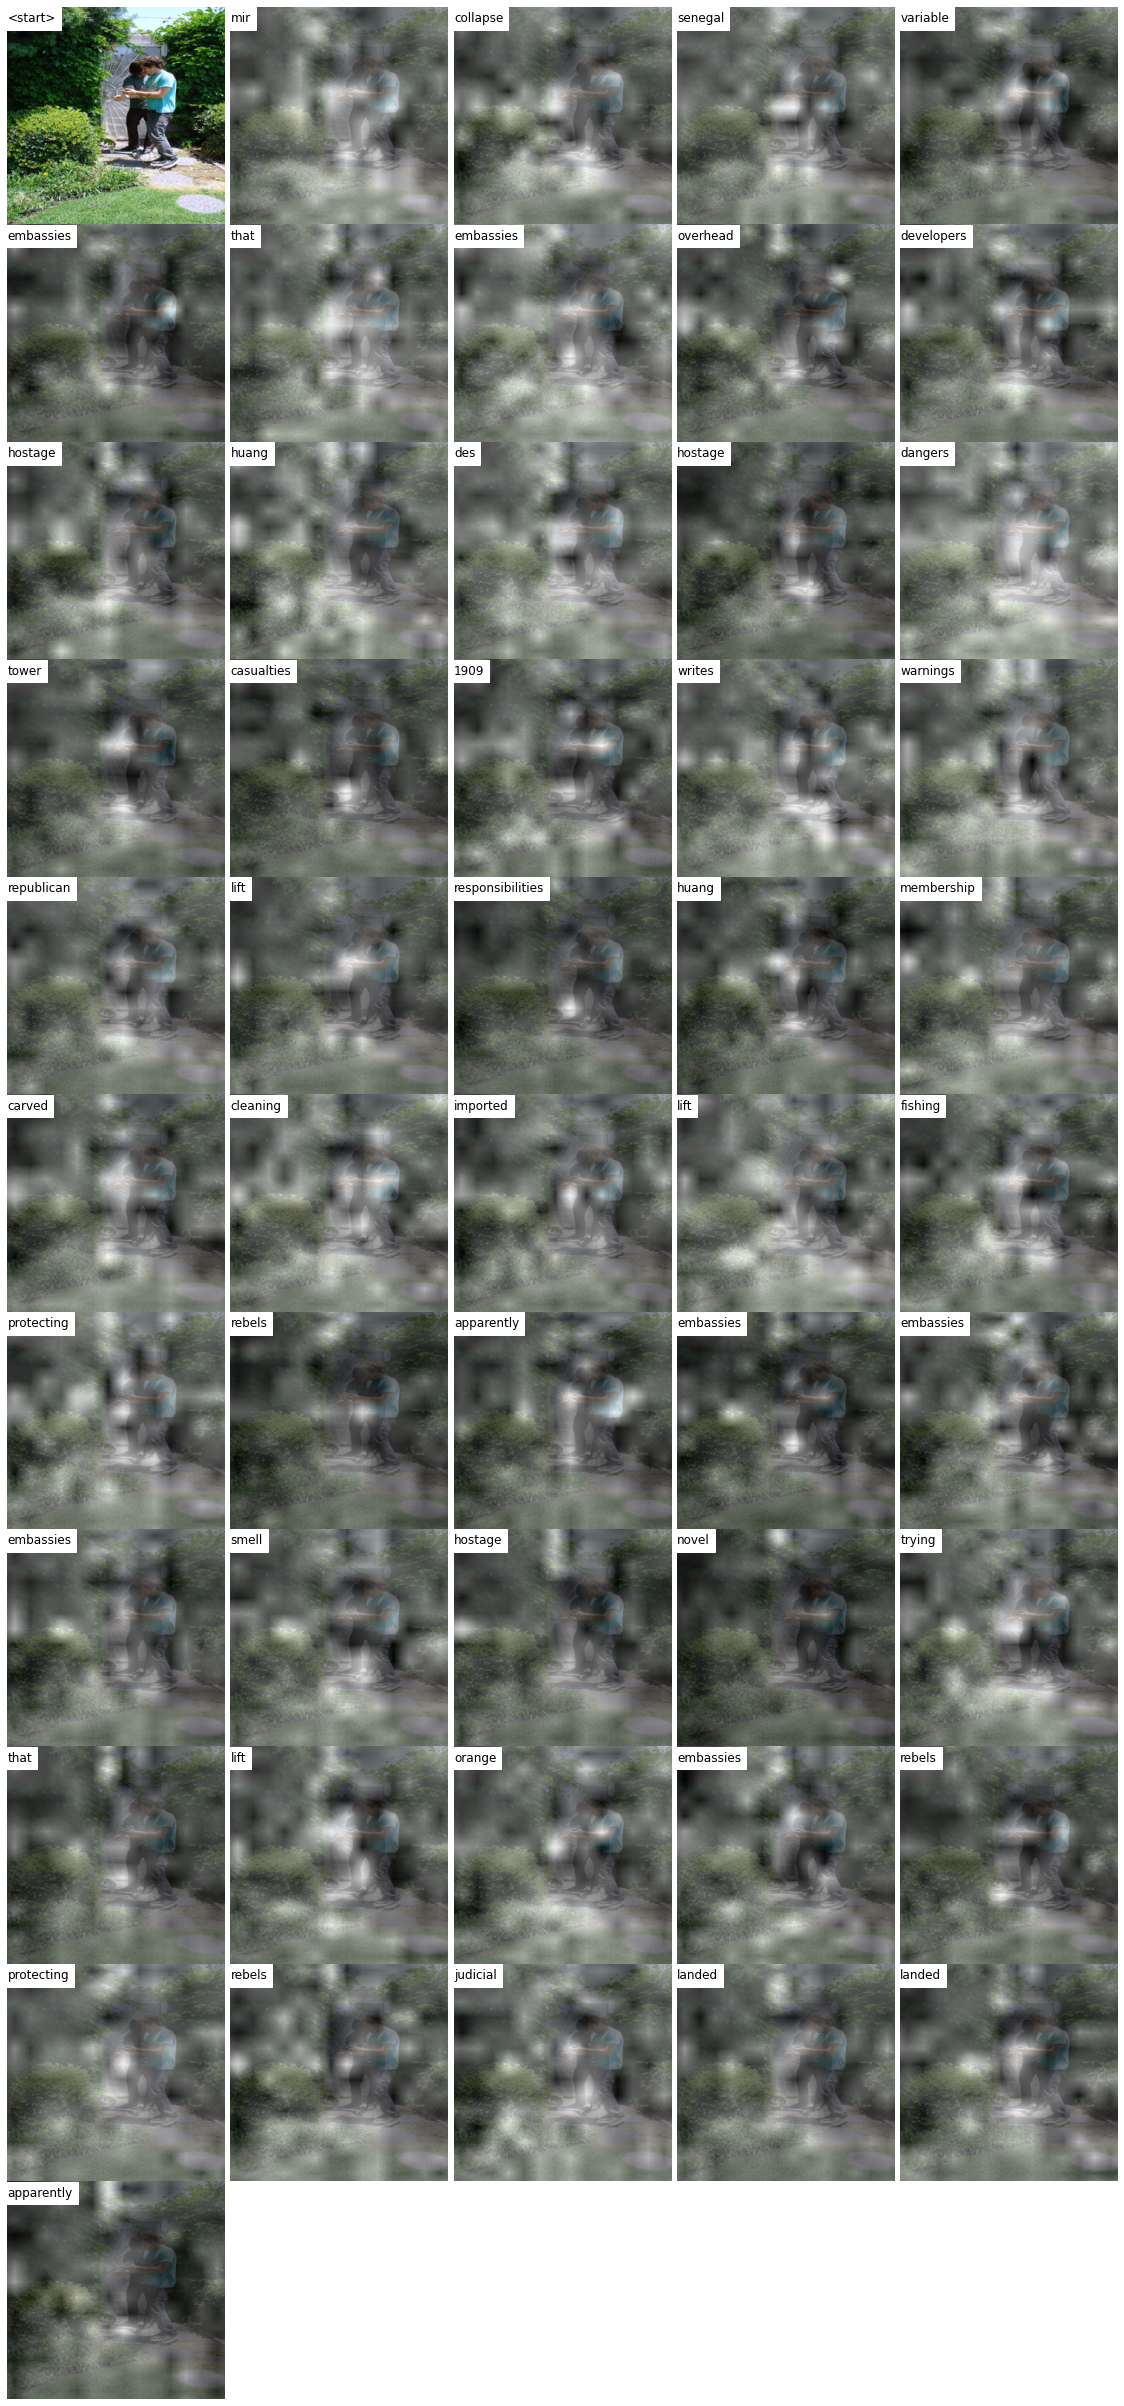

In [46]:
# INFERENCE
preds, alphas = decoder.beam(features)
print(preds)
preds_decoded = vocab.decode(preds)
print(preds_decoded)
print(img_tensor.shape)
print(alphas[0].shape)
visualize_attention(img_tensor, alphas[0], preds_decoded[0]);

In [15]:
train(data, encoder, decoder, vocab)

TypeError: train() takes 1 positional argument but 4 were given

In [ ]:
from simloss import SimLoss

sl = SimLoss(vocab, decoder.embedding_model)


In [ ]:
word1 = vocab.encode([['cat']])[0][0][1]
word2 = vocab.encode([['dog']])[0][0][1]
print(sl.S[word1, word2])